In [1]:
from tensorflow import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [4]:
dataset_dir = "./LP-IV-datasets/Object Detection(Ass6)/caltech-101-img"

dataset_datagen = ImageDataGenerator(
    rescale=1.0/255,
)

batch_size=3000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    batch_size=batch_size,
    target_size=(64,64),
    class_mode='categorical',
)

Found 9144 images belonging to 102 classes.


In [5]:
x_train, y_train =dataset_generator[0]
x_test, y_test =dataset_generator[1]

print(len(x_train))
print(len(x_test))

3000
3000


In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

In [7]:
weights_path = "./LP-IV-datasets/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [8]:
base_model = VGG16(weights=weights_path,include_top=False,input_shape=(64,64,3))

for layer in base_model.layers:
    layer.trainable = False
x = Flatten()(base_model.output)
x = Dense(64,activation='relu')(x)
predictions = Dense(102,activation='softmax')(x)

model = Model(inputs=base_model.input,outputs=predictions)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=10)

Epoch 1/10
47/47 [==============================] - 36s 748ms/step - loss: 3.8017 - accuracy: 0.2307 - val_loss: 3.2913 - val_accuracy: 0.3067
Epoch 2/10
47/47 [==============================] - 37s 786ms/step - loss: 2.7932 - accuracy: 0.4147 - val_loss: 2.7666 - val_accuracy: 0.4147
Epoch 3/10
47/47 [==============================] - 37s 796ms/step - loss: 2.2348 - accuracy: 0.5177 - val_loss: 2.3862 - val_accuracy: 0.4713
Epoch 4/10
47/47 [==============================] - 36s 776ms/step - loss: 1.8231 - accuracy: 0.6060 - val_loss: 2.1829 - val_accuracy: 0.5003
Epoch 5/10
47/47 [==============================] - 36s 770ms/step - loss: 1.5527 - accuracy: 0.6603 - val_loss: 2.0355 - val_accuracy: 0.5293
Epoch 6/10
47/47 [==============================] - 37s 792ms/step - loss: 1.3472 - accuracy: 0.6920 - val_loss: 1.9330 - val_accuracy: 0.5473
Epoch 7/10
47/47 [==============================] - 37s 792ms/step - loss: 1.1734 - accuracy: 0.7380 - val_loss: 1.8769 - val_accuracy: 0.5497

In [12]:
base_model = VGG16(weights=weights_path, include_top=False,input_shape=(64,64,3))

for layer in base_model.layers:
    layer.trainable = False

for later in base_model.layers[len(base_model.layers)-2:]:
    layer.trainable = True

x = Flatten()(base_model.output)
x = Dense(512,activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(102,activation='softmax')(x)

In [13]:
model = Model(inputs=base_model.input,outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=20)

Epoch 1/20
47/47 [==============================] - 37s 775ms/step - loss: 3.1927 - accuracy: 0.3423 - val_loss: 2.5128 - val_accuracy: 0.4533
Epoch 2/20
47/47 [==============================] - 36s 767ms/step - loss: 1.9825 - accuracy: 0.5413 - val_loss: 2.0162 - val_accuracy: 0.5347
Epoch 3/20
47/47 [==============================] - 36s 784ms/step - loss: 1.4351 - accuracy: 0.6540 - val_loss: 1.8077 - val_accuracy: 0.5637
Epoch 4/20
 5/47 [==>...........................] - ETA: 16s - loss: 1.1147 - accuracy: 0.7375

KeyboardInterrupt: 

94/94 [==============================] - 27s 290ms/step
Predicted: cougar_face
Actual: gramophone


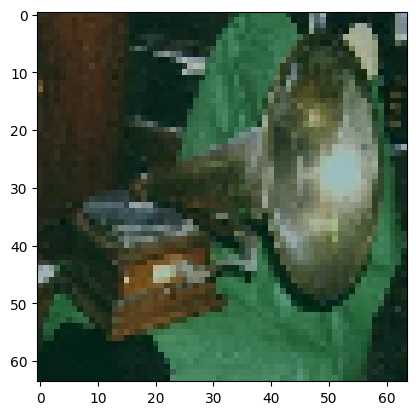

In [15]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)
labels = list(dataset_generator.class_indices.keys())

n=100
plt.imshow(x_test[n])

print("Predicted:",labels[np.argmax(predicted_value[n])])
print("Actual:",labels[np.argmax(y_test[n])])